In [1]:
%pylab inline
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
# if xarray doesn't work, may need to upgrade it 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
cd D:

D:\


In [4]:
cd yello\Documents\Lab_UIUC

D:\yello\Documents\Lab_UIUC


In [5]:
# File Name Generator 
def filename_generator(season, folder_date, start_date, end_date):
    if season == 'winter':
        months = ['-12', '-01', '-02']
    elif season == 'summer': 
        months = ['-06', '-07', '-08']
    else: 
        print('give a season')
    
    
    if folder_date == '3.8.2020':
        prefix = 'Practice_3.8.2020\clm50_cesm201R_1deg_GSWP3V1_GHSL_SELECT_2000.clm2.h0.'
    elif folder_date == '3.26.2020':
        if season == 'winter':
            prefix = 'Practice_3.26.2020\DJF\clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h0.'
        else: 
            prefix = 'Practice_3.26.2020\JJA\clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h0.'
    else: 
        print('give folder date')
    
    years = list(str(i) for i in range(start_date, end_date+1))
    suffix = '.nc'
    filenames = [prefix+year+month+suffix for month in months for year in years]
    return filenames     

## 2015 - 2024 Winter 

In [8]:
filenames = filename_generator(season='winter', folder_date='3.26.2020', start_date=2015, end_date=2024)
print(filenames)

['Practice_3.26.2020\\DJF\\clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h0.2015-12.nc', 'Practice_3.26.2020\\DJF\\clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h0.2016-12.nc', 'Practice_3.26.2020\\DJF\\clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h0.2017-12.nc', 'Practice_3.26.2020\\DJF\\clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h0.2018-12.nc', 'Practice_3.26.2020\\DJF\\clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h0.2019-12.nc', 'Practice_3.26.2020\\DJF\\clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h0.2020-12.nc', 'Practice_3.26.2020\\DJF\\clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h0.2021-12.nc', 'Practice_3.26.2020\\DJF\\clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h0.2022-12.nc', 'Practice_3.26.2020\\DJF\\clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h0.2023-12.nc', 'Practice_3.26.2020\\DJF\\clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h0.2024-12.nc', 'Practice_3.26.2020

In [19]:
# Open files and combine by coordinates 
from timeit import default_timer as timer
start = timer()

# My Code 
nc_2015 = xr.open_mfdataset(filenames, combine='by_coords')

end = timer()
time = end - start 
print(time)

360.46829560000003


In [ ]:
# Evaporative Cooling Potential - Winter 2015-2024 
###### NO TSA_U/TSA_R VARIABLE IN THIS NEW DATASET 
from timeit import default_timer as timer
start = timer()

fig, axes = plt.subplots(figsize=(20,10))
        
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.set_global()
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

plot_var = ((nc_2015['TSA_U']-nc_2015['TSA_R']) - (nc_2015['WBT_U']-nc_2015['WBT_R'])).mean(dim='time')
plot_var.plot(transform=ccrs.PlateCarree(), cmap='seismic')

plt.title("Evaporative Cooling Potential - Winter 2015-2024", size=20);

end = timer()
time = end - start 
print(time)

1.778523099999802


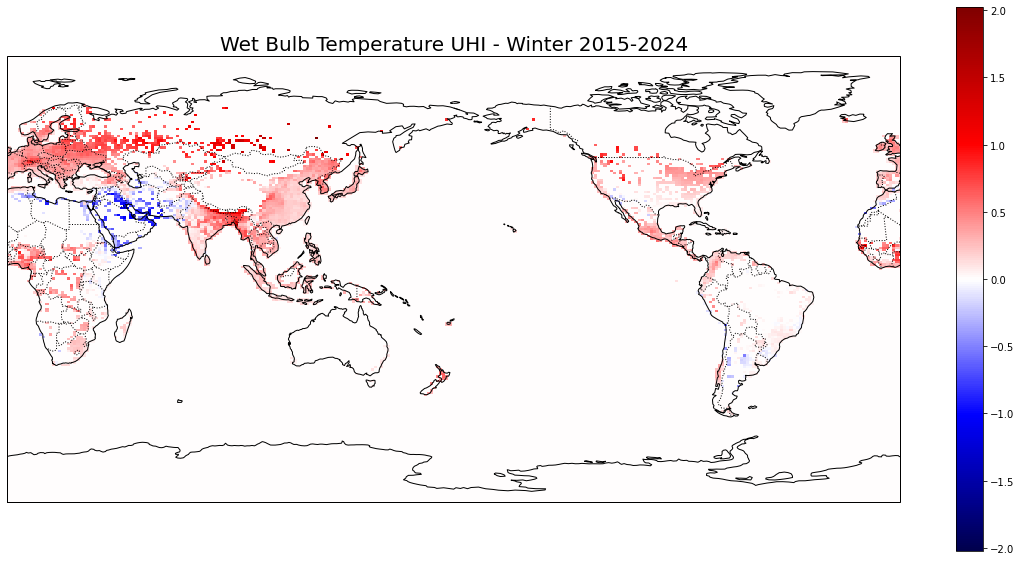

In [20]:
# Wet Bulb Temperature - Winter 2015-2024 
from timeit import default_timer as timer
start = timer()

fig, axes = plt.subplots(figsize=(20,10))
        
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.set_global()
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

plot_var = ((nc_2015['WBT_U']-nc_2015['WBT_R'])).mean(dim='time')
plot_var.plot(transform=ccrs.PlateCarree(), cmap='seismic')

plt.title("Wet Bulb Temperature UHI - Winter 2015-2024", size=20);

end = timer()
time = end - start 
print(time)

## 2091 - 2100 Winter 

In [21]:
# Create list of names of all the files to import
filenames = filename_generator(season=winter, start_year=2091, end_year=2100, folder_date='3.26.2020')

TypeError: filename_generator() got an unexpected keyword argument 'start_year'

## Winter 2010 Evaporative Cooling Potential 

In [23]:
# Create list of names of all the files to import
filenames = filename_generator(season='winter', start_date=2010, end_date=2010, folder_date='3.8.2020')
print(filenames)

['Practice_3.8.2020\\clm50_cesm201R_1deg_GSWP3V1_GHSL_SELECT_2000.clm2.h0.2010-12.nc', 'Practice_3.8.2020\\clm50_cesm201R_1deg_GSWP3V1_GHSL_SELECT_2000.clm2.h0.2010-01.nc', 'Practice_3.8.2020\\clm50_cesm201R_1deg_GSWP3V1_GHSL_SELECT_2000.clm2.h0.2010-02.nc']


In [24]:
# Open files and combine by coordinates 
nc_winter_2010 = xr.open_mfdataset(filenames, combine='by_coords')

C:\Users\yello\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


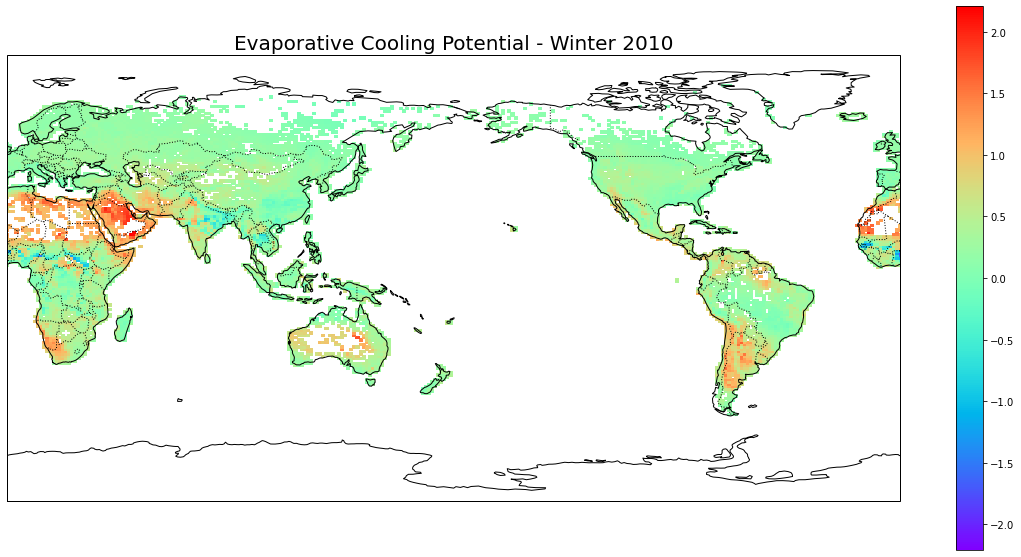

In [25]:
# TSA UHI - Winter 2010 Average 

fig, axes = plt.subplots(figsize=(20,10))
        
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.set_global()
ax.add_feature(cfeature.BORDERS, linestyle=':') # NEW 
ax.coastlines()

plot_var = ((nc_winter_2010['TSA_U']-nc_winter_2010['TSA_R']) - (nc_winter_2010['WBT_U']-nc_winter_2010['WBT_R'])).mean(dim='time')
plot_var.plot(transform=ccrs.PlateCarree(), cmap='rainbow')

plt.title("Evaporative Cooling Potential - Winter 2010", size=20);
plt.savefig('D:\yello\Documents\Lab_UIUC\Practice_3.8.2020\ECP_UHI_Winter2010_Rainbow')

C:\Users\yello\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\yello\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(-0.9999647, dtype=float32)

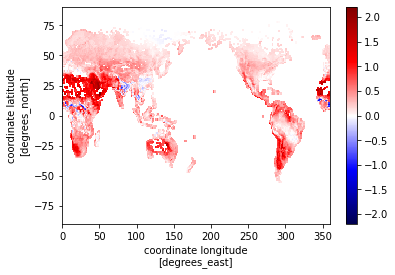

In [113]:
# Basic ECP Plot - Version 1 - Winter 2010 Average 
((nc['TSA_U']-nc['TSA_R']).mean(dim='time') - (nc['WBT_U']-nc['WBT_R']).mean(dim='time')).plot(cmap='seismic')
((nc['TSA_U']-nc['TSA_R']).mean(dim='time') - (nc['WBT_U']-nc['WBT_R']).mean(dim='time')).sel(lat='10.8', lon='5', method='nearest').values

C:\Users\yello\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\yello\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(-0.9999647, dtype=float32)

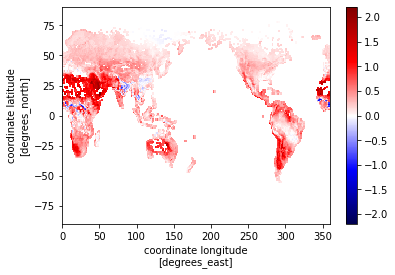

In [114]:
# Basic ECP Plot - Version 2 - Winter 2010 Average (looks same as version 1)
((nc['TSA_U']-nc['TSA_R']) - (nc['WBT_U']-nc['WBT_R'])).mean(dim='time').plot(cmap='seismic')
((nc['TSA_U']-nc['TSA_R']) - (nc['WBT_U']-nc['WBT_R'])).mean(dim='time').sel(lat='10.8', lon='5', method='nearest').values

In [98]:
# do the mean and then select out point for verification 
new = nc['WBT_U'].mean(dim='time')
new.sel(lat='10.8', lon='5', method='nearest').values

C:\Users\yello\Anaconda3\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(13.90461, dtype=float32)

In [87]:
# select out point for verification and then find the mean of those 
nc['WBT_U'].sel(lat='10.8377', lon='5', method='nearest').values.mean()

13.90461

Old Code 

In [8]:
nc = xr.open_dataset('Practice_3.8.2020\clm50_cesm201R_1deg_GSWP3V1_GHSL_SELECT_2000.clm2.h0.2010-01.nc')

In [50]:
nc_TSA_U = nc['TSA_U']
nc_TSA_R = nc['TSA_R']
nc_TSA_UHI = nc_TSA_U - nc_TSA_R

In [56]:
months = ('12', '01', '02')

nc12 = xr.open_dataset('D:\yello\Documents\Lab_UIUC\Practice_3.8.2020\clm50_cesm201R_1deg_GSWP3V1_GHSL_SELECT_2000.clm2.h0.2010-12.nc')
nc01 = xr.open_dataset('D:\yello\Documents\Lab_UIUC\Practice_3.8.2020\clm50_cesm201R_1deg_GSWP3V1_GHSL_SELECT_2000.clm2.h0.2010-01.nc')
nc02 = xr.open_dataset('D:\yello\Documents\Lab_UIUC\Practice_3.8.2020\clm50_cesm201R_1deg_GSWP3V1_GHSL_SELECT_2000.clm2.h0.2010-02.nc')

# dates in the metadata don't quite match the data in the file name 

nc12_TSA_UHI = nc12['TSA_U'] - nc12['TSA_R']
nc01_TSA_UHI = nc01['TSA_U'] - nc01['TSA_R']
nc02_TSA_UHI = nc02['TSA_U'] - nc02['TSA_R']

#nc12_TSA_UHI.name = 'nc12_TSA_UHI'
#nc01_TSA_UHI.name = 'nc01_TSA_UHI'
#nc02_TSA_UHI.name = 'nc02_TSA_UHI'

In [59]:
nc12_TSA_UHI.attrs

{}

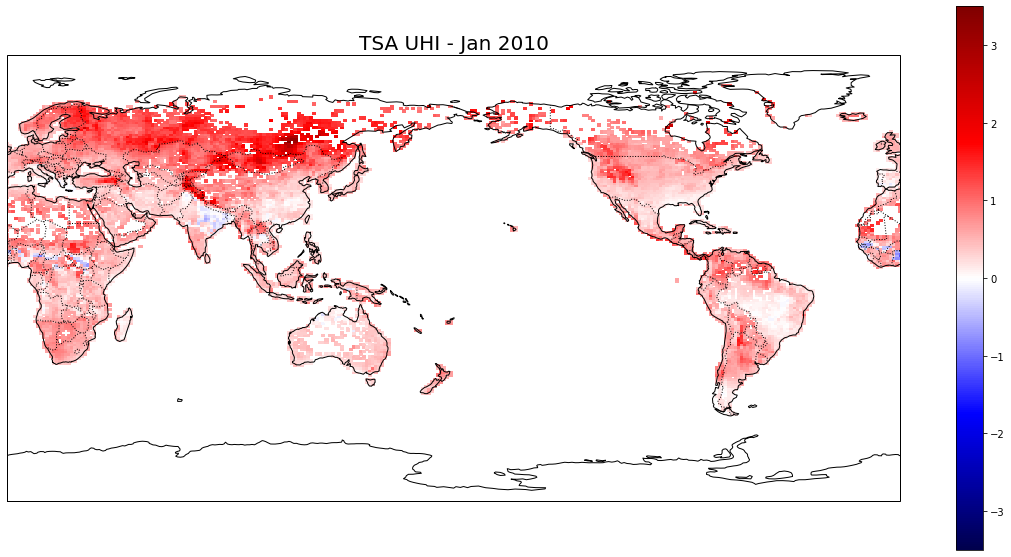

In [13]:
# TSA UHI 
fig, axes = plt.subplots(figsize=(20,10))
        
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.set_global()
ax.add_feature(cfeature.BORDERS, linestyle=':') # NEW 
ax.coastlines()

(nc['TSA_U']-nc['TSA_R']).squeeze().plot(transform=ccrs.PlateCarree(), cmap='seismic', vmin=-3.5, vmax=3.5)

plt.title("TSA UHI - Jan 2010", size=20);


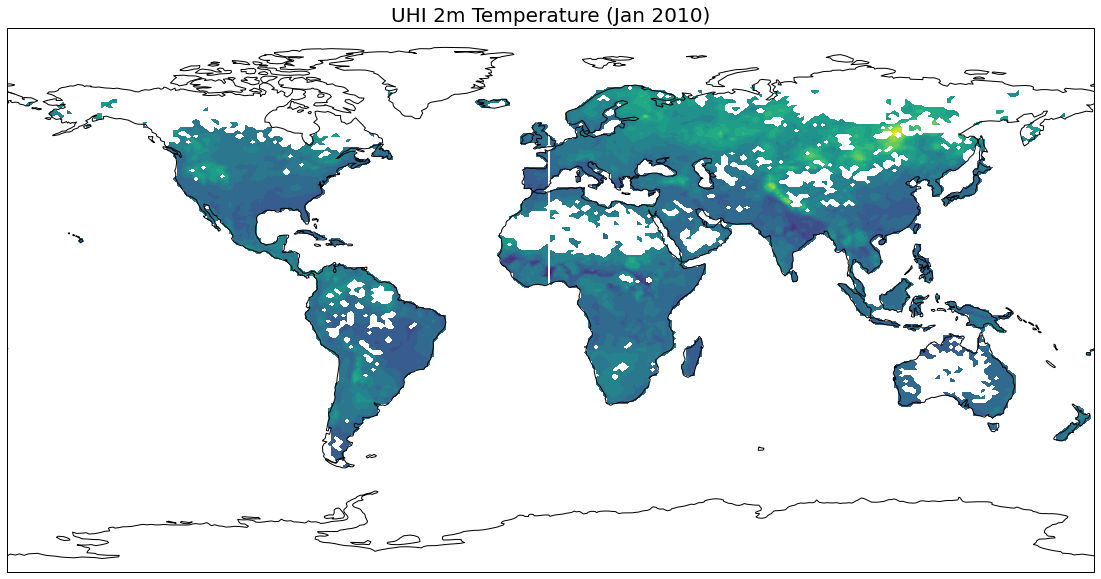

In [12]:
# UHI TSA 
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

plt.contourf(nc['lon'], nc['lat'], (nc['TSA_U']-nc['TSA_R']).squeeze(), levels=20, transform=ccrs.PlateCarree())

plt.title('UHI 2m Temperature (Jan 2010)', fontsize=20)
ax.coastlines()

# plt.colorbar(fraction=0.046, pad=0.04)
#plt.savefig('D:\yello\Documents\Lab_UIUC\Practice_3.8.2020\TSA_UHI_012010')

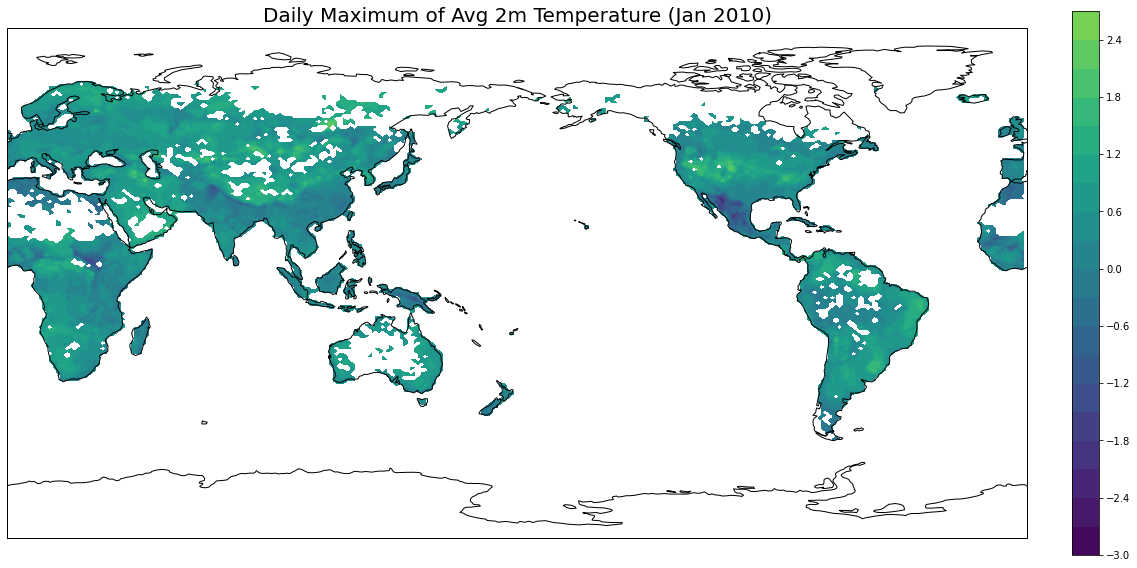

In [10]:
# TREFMXAV Urban-Rural Difference 
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax1.set_global()

plt.contourf(nc['lon'], nc['lat'], (nc['TREFMXAV_U']-nc['TREFMXAV_R']).squeeze(), levels=20, transform=ccrs.PlateCarree())
plt.clim(-3, 4)

plt.title('Daily Maximum of Avg 2m Temperature (Jan 2010)', fontsize=20)
ax1.coastlines()

plt.colorbar(fraction=0.046, pad=0.04)
#plt.savefig('D:\yello\Documents\Lab_UIUC\Practice_3.8.2020\TREFMXAV_DIFF_012010')

NameError: name 'nc' is not defined

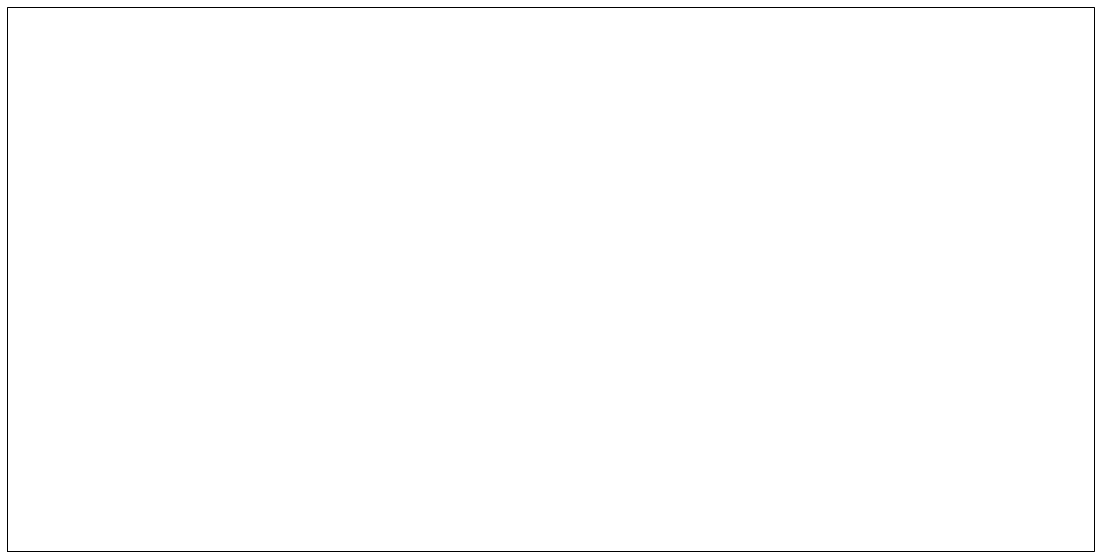

In [6]:
# TREFMNAV Urban-Rural Difference
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.set_global()

plt.contourf(nc['lon'], nc['lat'], (nc['TREFMNAV_U']-nc['TREFMNAV_R']).squeeze(), levels=20, transform=ccrs.PlateCarree())
plt.clim(-3, 4)

plt.title('Daily Minimum of Avg 2m Temperature (Jan 2010)', fontsize=20)
ax.coastlines()

plt.colorbar(fraction=0.046, pad=0.04)
plt.savefig('D:\yello\Documents\Lab_UIUC\Practice_3.8.2020\TREFMNAV_DIFF_012010')